# Tourism Package adoption

In [38]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_tourism2 = pd.read_csv('df_tourism2.csv')
df_tourism2 = df_tourism2.iloc[:,1:19]
df_tourism2.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.000000,6.0,3.0,3.0,1.0,2.0,0.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.000000,14.0,3.0,4.0,2.0,3.0,2.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.000000,8.0,3.0,4.0,7.0,3.0,0.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.000000,9.0,2.0,3.0,2.0,5.0,1.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,33.908223,8.0,2.0,3.0,1.0,5.0,0.0


In [40]:
#Checking the imbalance level in the target variable
df_tourism2['ProdTaken'].value_counts(normalize=True)

No     0.811784
Yes    0.188216
Name: ProdTaken, dtype: float64

We can see from the above there is a good amount of class imbalance in the data w.r.t the target variable i.e. _*ProdTaken*_. To take care of this imbalance we will have to apply SMOTE. Before applying SMOTE we will split the data into training and testing sets to avoid introducing bias in the test data set.
But even before that we need to converta all the categorical variables into numerical form so that it is conducive to modelling.

In [41]:
df_tourism2['ProductPitched_codes'] = df_tourism2['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
df_tourism2.drop('ProductPitched',inplace=True,axis=1)
df_tourism2['PreferredPropertyStar_codes'] = df_tourism2['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
df_tourism2.drop('PreferredPropertyStar',inplace=True,axis=1)
df_tourism2['Designation_codes'] = df_tourism2['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
df_tourism2.drop('Designation',inplace=True,axis=1)

In [42]:
categorical = list(df_tourism2.dtypes[df_tourism2.dtypes == object].index)
numerical = list(df_tourism2.dtypes[df_tourism2.dtypes != object].index)
df_tourism2_cat = df_tourism2[categorical]
df_tourism2_dummies = pd.get_dummies(df_tourism2_cat,drop_first=True)
df_tourism2_dummified = pd.concat([df_tourism2[numerical],df_tourism2_dummies],axis=1)
df_tourism2_dummified.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,ProductPitched_codes,PreferredPropertyStar_codes,Designation_codes,...,CityTier_Tier-3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_Yes,OwnCar_Yes
0,41.000000,6.0,3.0,3.0,1.0,2.0,0.0,4,1,2,...,1,0,1,0,0,0,1,0,1,1
1,49.000000,14.0,3.0,4.0,2.0,3.0,2.0,4,2,2,...,0,0,1,0,1,0,0,0,0,1
2,37.000000,8.0,3.0,4.0,7.0,3.0,0.0,1,1,1,...,0,0,0,0,1,0,1,0,1,0
3,33.000000,9.0,2.0,3.0,2.0,5.0,1.0,1,1,1,...,0,0,1,0,0,0,0,0,1,1
4,33.908223,8.0,2.0,3.0,1.0,5.0,0.0,1,2,1,...,0,0,0,1,1,0,0,0,0,1


In [43]:
df_tourism2_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4888 non-null   float64
 1   DurationOfPitch                    4888 non-null   float64
 2   NumberOfPersonVisited              4888 non-null   float64
 3   NumberOfFollowups                  4888 non-null   float64
 4   NumberOfTrips                      4888 non-null   float64
 5   PitchSatisfactionScore             4888 non-null   float64
 6   NumberOfChildrenVisited            4888 non-null   float64
 7   ProductPitched_codes               4888 non-null   int64  
 8   PreferredPropertyStar_codes        4888 non-null   int64  
 9   Designation_codes                  4888 non-null   int64  
 10  ProdTaken_Yes                      4888 non-null   uint8  
 11  PreferredLoginDevice_Self Enquiry  4888 non-null   uint8

In [44]:
# Dividing the dataset into predictor and target variables
X = df_tourism2_dummified.loc[:,df_tourism2_dummified.columns != 'ProdTaken_Yes']
Y = df_tourism2_dummified.loc[:,df_tourism2_dummified.columns == 'ProdTaken_Yes']

In [45]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [46]:
# Applying SMOTE to the training data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=1234)
os_data_X,os_data_Y = os.fit_sample(X_train,Y_train)
os_data_X = pd.DataFrame(os_data_X,columns = X_train.columns)
os_data_Y = pd.DataFrame(os_data_Y,columns = Y_train.columns)

In [47]:
os_data_Y.value_counts(normalize=True)

ProdTaken_Yes
1                0.5
0                0.5
dtype: float64

We can see from above that the proportion of the minority class i.e. *Churn_yes* has been increased from approximately 19% to 50%. 

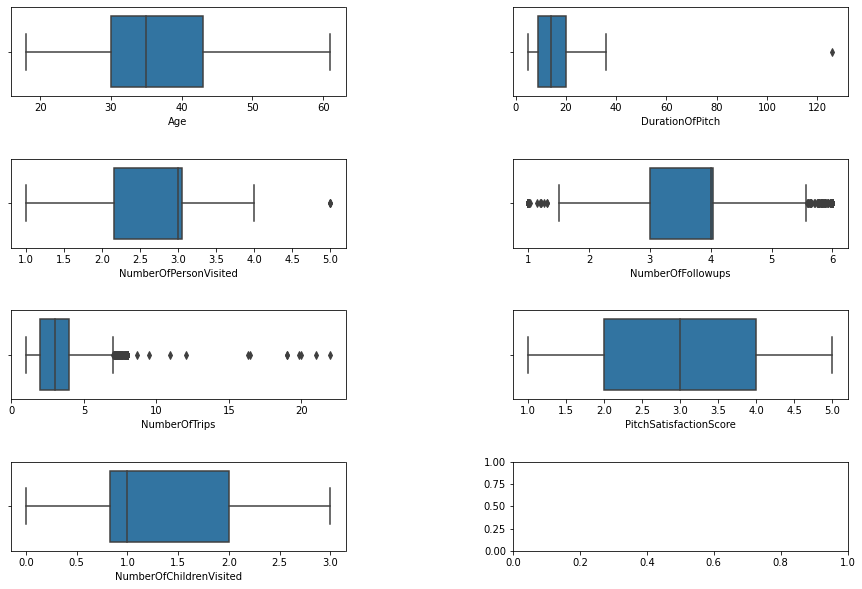

In [48]:
# Checking for outliers
num = list(os_data_X.dtypes[os_data_X.dtypes == 'float64'].index)
fig,axes = plt.subplots(4,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=os_data_X,ax=j)

In [49]:
# Treating the Outliers - Winsorization
def remove_outlier(col):
    sorted(col) # Sorting the column
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for i in num:
    ll,ul = remove_outlier(os_data_X[i])
    os_data_X[i] = np.where(os_data_X[i]>ul,os_data_X[i].quantile(0.95),os_data_X[i])
    os_data_X[i] = np.where(os_data_X[i]<ll,os_data_X[i].quantile(0.05),os_data_X[i])    

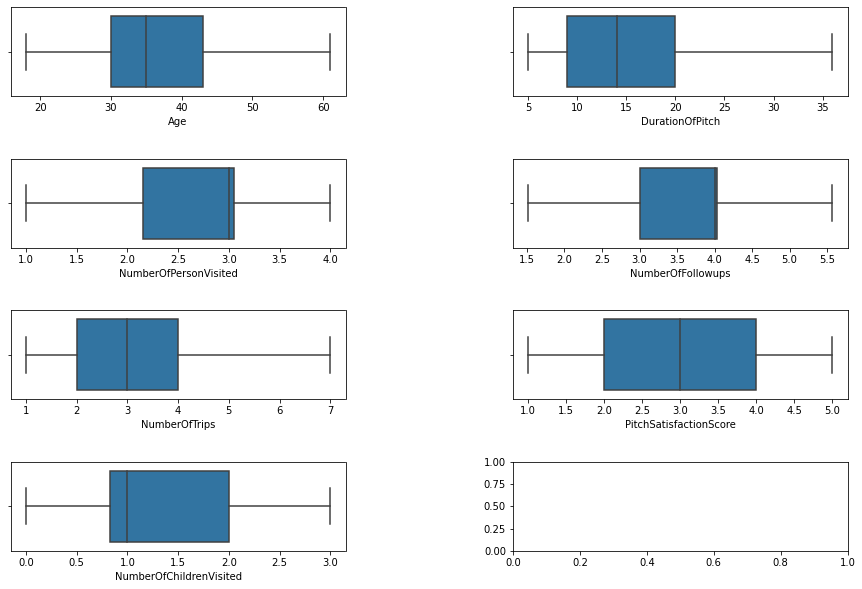

In [50]:
fig,axes = plt.subplots(4,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=os_data_X,ax=j)

In [51]:
import statsmodels.api as sm
logit_mod = sm.Logit(os_data_Y,os_data_X)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\Aniruddh Mukerji\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Coef,Pvalue
Age,0.007192,6.428612e-02
DurationOfPitch,0.035776,1.436129e-16
NumberOfPersonVisited,0.229219,2.367372e-04
NumberOfFollowups,0.626836,2.615231e-50
NumberOfTrips,0.044182,4.017882e-02
PitchSatisfactionScore,0.210397,4.639361e-16
NumberOfChildrenVisited,-0.311111,6.255559e-09
ProductPitched_codes,-0.331339,9.578961e-23
PreferredPropertyStar_codes,0.374483,2.471781e-18
Designation_codes,-0.338586,4.418323e-12


In [1]:
# Identifying the non significant variables
coef_summary[coef_summary['Pvalue']>0.05]

NameError: name 'coef_summary' is not defined

In [53]:
# Building a model considering only the significant variables
os_data_X = os_data_X[['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisited',
       'ProductPitched_codes', 'PreferredPropertyStar_codes',
       'Designation_codes', 'PreferredLoginDevice_Self Enquiry', 'CityTier_Tier-3', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Passport_Yes', 'OwnCar_Yes',
X_test = X_test[['Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisited',
       'ProductPitched_codes', 'PreferredPropertyStar_codes',
       'Designation_codes', 'PreferredLoginDevice_Self Enquiry', 'CityTier_Tier-3', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Passport_Yes', 'OwnCar_Yes']]

logit_mod = sm.Logit(os_data_Y,os_data_X)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\Aniruddh Mukerji\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Coef,Pvalue
Age,0.007301,5.991950e-02
DurationOfPitch,0.035684,1.488879e-16
NumberOfPersonVisited,0.229869,2.195118e-04
NumberOfFollowups,0.627499,5.715122e-51
NumberOfTrips,0.044008,4.087991e-02
PitchSatisfactionScore,0.210555,3.985992e-16
NumberOfChildrenVisited,-0.310529,6.282568e-09
ProductPitched_codes,-0.330475,1.051183e-22
PreferredPropertyStar_codes,0.374560,2.191570e-18
Designation_codes,-0.339747,3.493151e-12


In [54]:
# Interpreting the Coefficients
coef_summary['Odds'] = np.exp(coef_summary['Coef'])
coef_summary['Prob'] = (coef_summary['Odds'])/(coef_summary['Odds']+1)
coef_summary

,Coef,Pvalue,Odds,Prob
Age,0.007301,5.991950e-02,1.007328,0.501825
DurationOfPitch,0.035684,1.488879e-16,1.036328,0.508920
NumberOfPersonVisited,0.229869,2.195118e-04,1.258435,0.557215
NumberOfFollowups,0.627499,5.715122e-51,1.872921,0.651922
NumberOfTrips,0.044008,4.087991e-02,1.044990,0.511000
PitchSatisfactionScore,0.210555,3.985992e-16,1.234363,0.552445
NumberOfChildrenVisited,-0.310529,6.282568e-09,0.733059,0.422985
ProductPitched_codes,-0.330475,1.051183e-22,0.718582,0.418125
PreferredPropertyStar_codes,0.374560,2.191570e-18,1.454351,0.592560
Designation_codes,-0.339747,3.493151e-12,0.711950,0.415871


In [55]:
# Looking at the baseline accuracy scores 
from sklearn.metrics import confusion_matrix
con_mat_train = confusion_matrix(os_data_Y,round(result.predict(os_data_X),0))
print('Training Accuracy of Logistic Model: {:.3f}'.format((con_mat_train[0,0]+con_mat_train[1,1])/con_mat_train.sum()))
con_mat_test = confusion_matrix(Y_test,round(result.predict(X_test),0))
print('Test Accuracy of Logistic Model: {:.3f}'.format((con_mat_test[0,0]+con_mat_test[1,1])/con_mat_test.sum()))

Training Accuracy of Logistic Model: 0.775
Test Accuracy of Logistic Model: 0.752


In [56]:
X_train = os_data_X
Y_train = os_data_Y

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.7s finished
C:\Users\Aniruddh Mukerji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


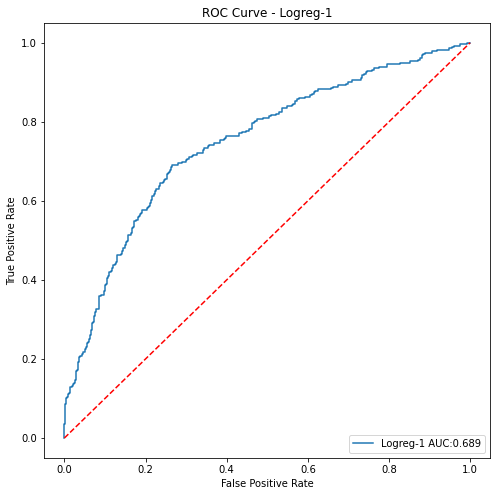

In [57]:
# Logreg Model-1
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
grid = {'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
model = LogisticRegression(max_iter=10000,n_jobs=-1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy',verbose=2)
grid_search.fit(X_train, Y_train.values.ravel())
LR1 = grid_search.best_estimator_
LR1.fit(X_train,Y_train)

Y_pred_tr_LR1 = LR1.predict(X_train)
Y_predprob_tr_LR1 = LR1.predict_proba(X_train)[:,1]
Y_pred_te_LR1 = LR1.predict(X_test)
Y_predprob_te_LR1 = LR1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_LR1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Logreg-1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_pred_te_LR1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logreg-1')
plt.legend(loc="lower right")

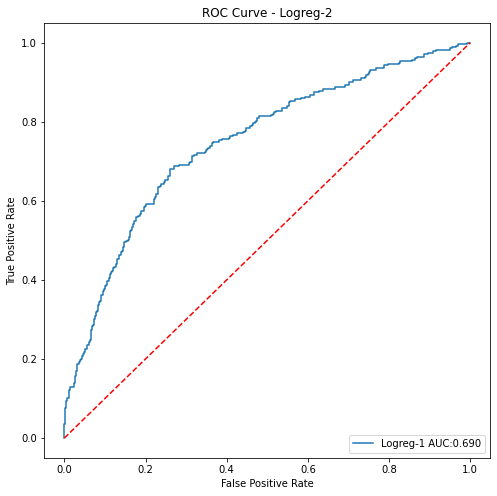

In [58]:
# Logreg Model-2
from sklearn.feature_selection import RFE
rfe = RFE(LR1,n_features_to_select=18)
rfe = rfe.fit(X_train,Y_train.values.ravel())
rfe.support_
col_selected = list(X_train.columns[rfe.support_])
X_train_FS = X_train[col_selected]
X_test_FS = X_test[col_selected]
LR2 = LogisticRegression(solver='newton-cg',random_state=1234)
LR2.fit(X_train_FS,Y_train.values.ravel())

Y_pred_tr_LR2 = LR2.predict(X_train_FS)
Y_predprob_tr_LR2 = LR2.predict_proba(X_train_FS)[:,1]
Y_pred_te_LR2 = LR2.predict(X_test_FS)
Y_predprob_te_LR2 = LR2.predict_proba(X_test_FS)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_LR2)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Logreg-1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_pred_te_LR2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logreg-2')
plt.legend(loc="lower right")

In [59]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [60]:
X_train.columns[rfe.support_]

Index(['DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisited',
       'ProductPitched_codes', 'PreferredPropertyStar_codes',
       'Designation_codes', 'PreferredLoginDevice_Self Enquiry',
       'CityTier_Tier-3', 'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Passport_Yes', 'OwnCar_Yes'],
      dtype='object')

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 2612 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 4712 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 7412 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  1.8min finished


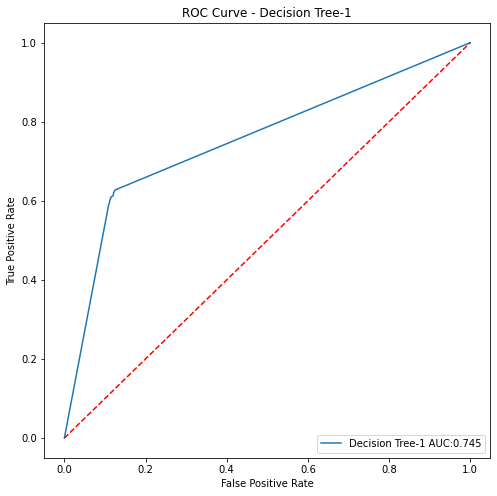

In [61]:
# Decision tree with hyperparameter tuning # will take 10 min so run beforehand
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT1 = DecisionTreeClassifier()
DT1.fit(X_train,Y_train.values.ravel())

parameters = {'criterion':['gini','entropy'],
        'max_depth':[2,5,10,15],
        'min_samples_split':[2,10,15,20,25,30,60,80,100],
       'min_samples_leaf':[1,7,10,15,20,33],
       'min_impurity_decrease':[0.0001,0.001]}
grid = GridSearchCV(DT1,param_grid = parameters,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,Y_train.values.ravel())

DT1 = grid.best_estimator_
DT1.fit(X_train,Y_train.values.ravel())
Y_pred_tr_DT1 = DT1.predict(X_train)
Y_predprob_tr_DT1 = DT1.predict_proba(X_train)[:,1]
Y_pred_te_DT1 = DT1.predict(X_test)
Y_predprob_te_DT1 = DT1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_DT1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Decision Tree-1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_pred_te_DT1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree-1')
plt.legend(loc="lower right")

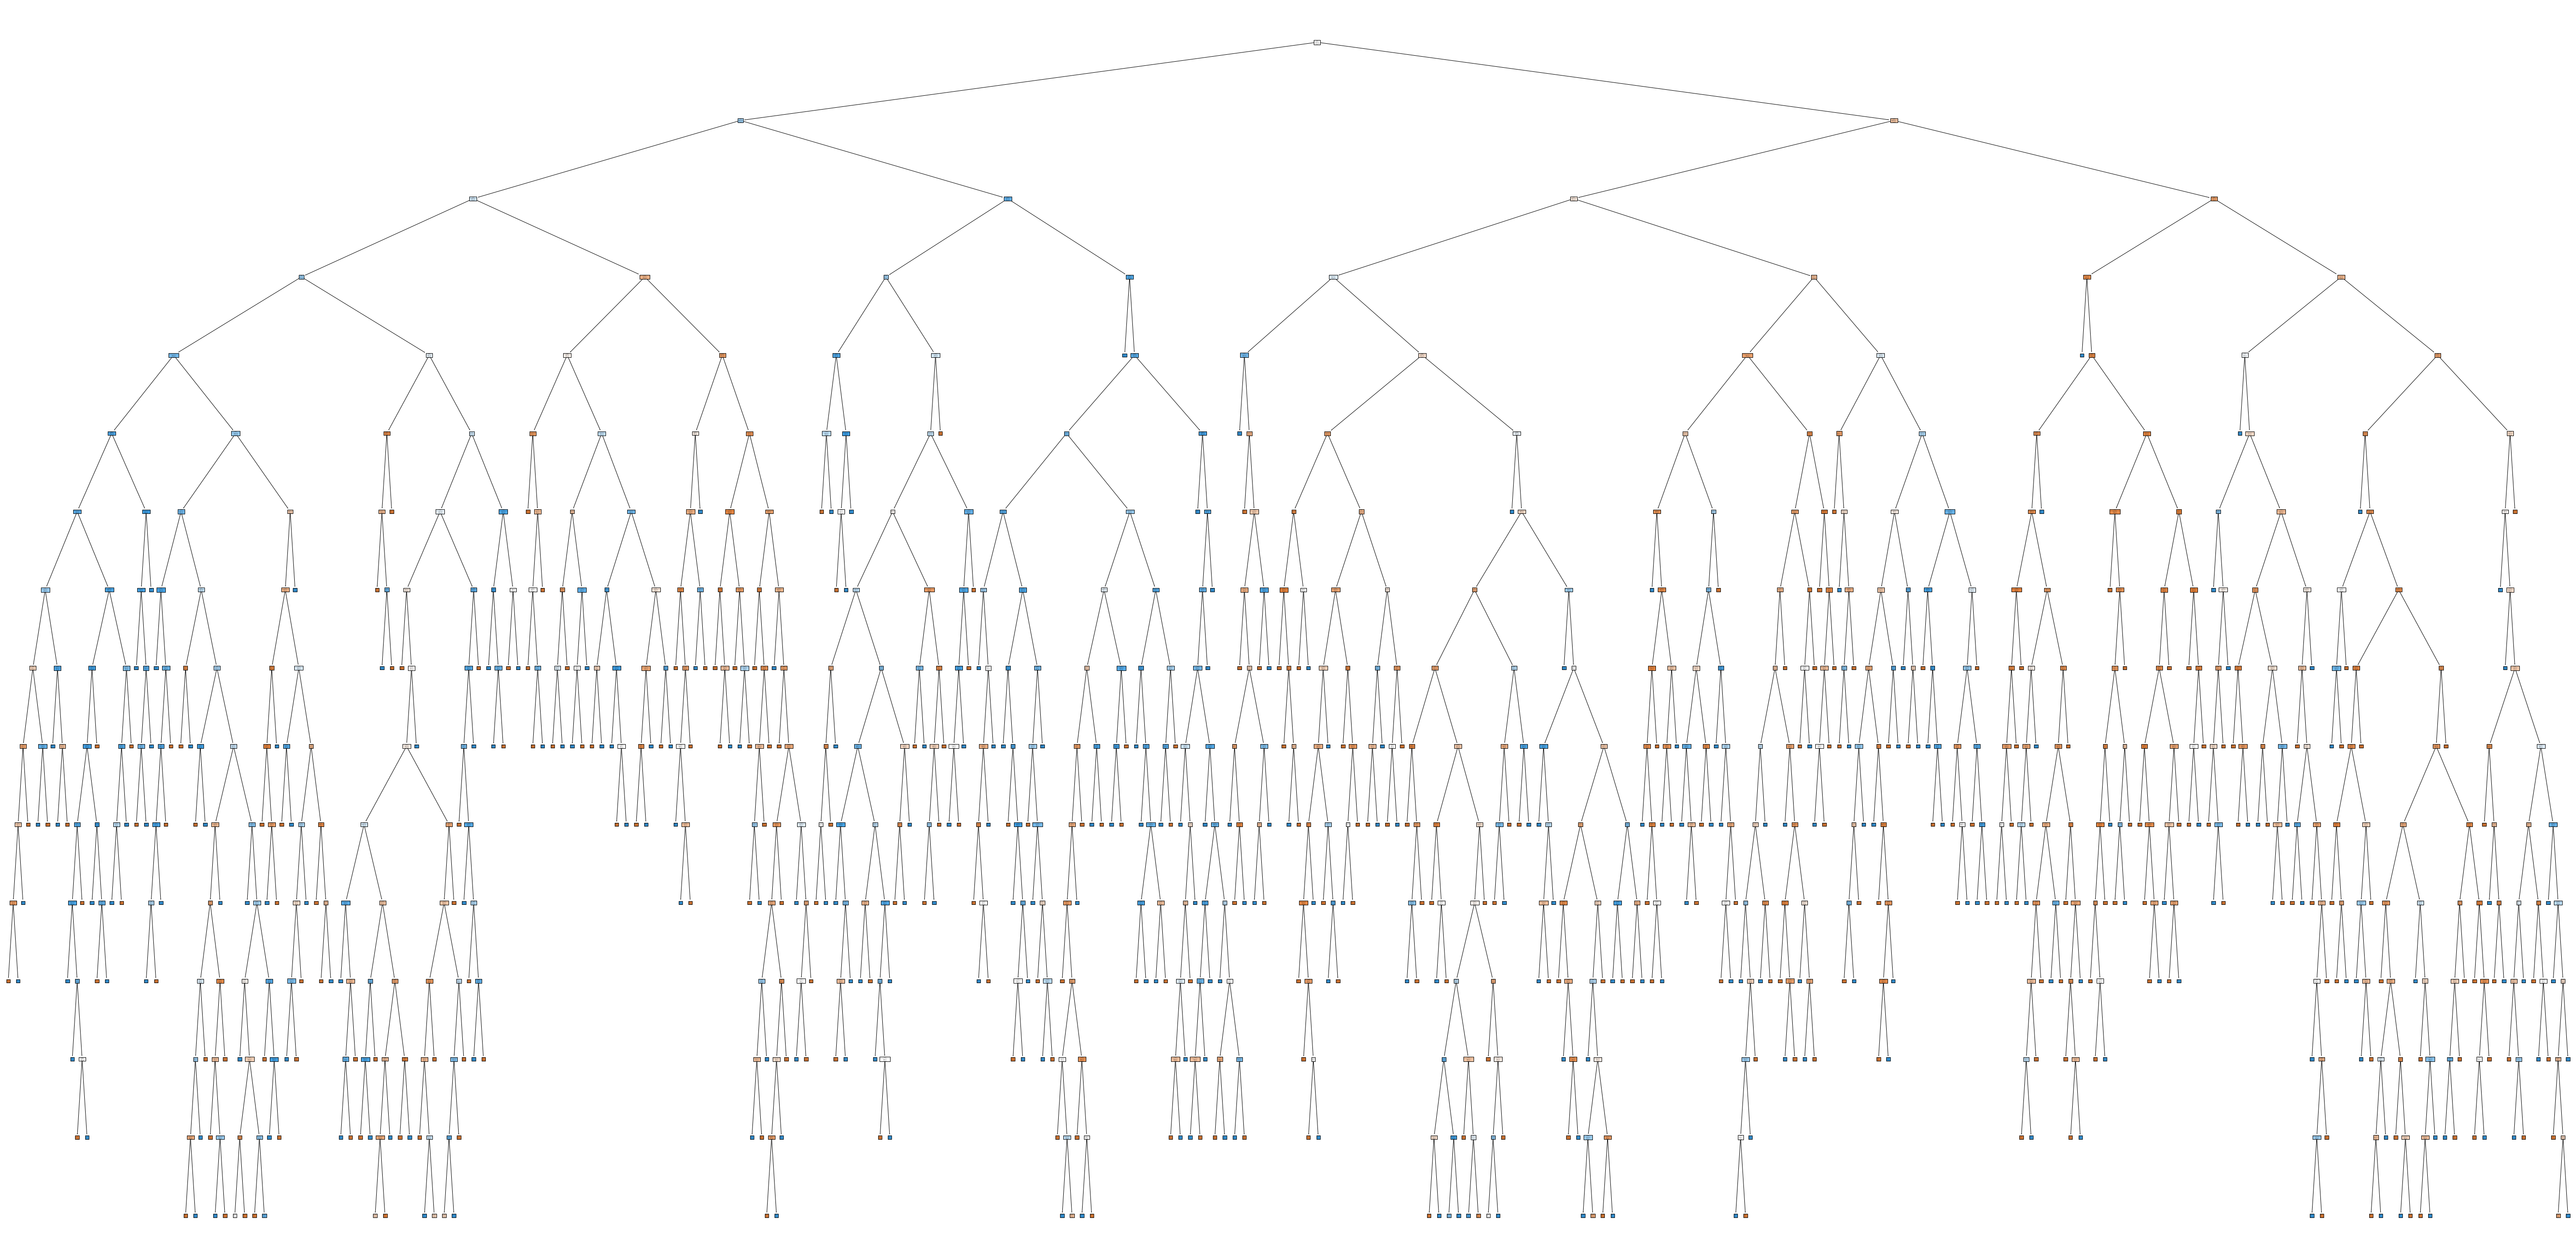

In [62]:
# Plotting the decision tree
fig,axis=plt.subplots(figsize=(100,50))
from sklearn.tree import plot_tree
plot_tree(DT1,
               feature_names=X_train.columns,
               class_names=['No','Yes'],
               node_ids=True,
               filled=True,ax=axis)
plt.savefig('Decision Tree_2.jpg')

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed: 16.0min finished


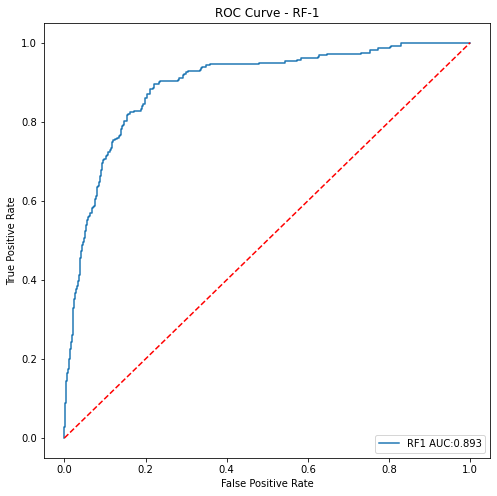

In [63]:
# Random Forests # will take 10 min so run beforehand
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier()
parameters = {'n_estimators':[60,80,100,200,300],
             'min_samples_split':[1,2,3],
             'min_samples_leaf':[1,5,10],
             'max_features': [2,3,4],
             'min_impurity_decrease':[0.00001,0.0001,0.001]}
grid = GridSearchCV(estimator=RF1,param_grid=parameters,cv=10,n_jobs=-1,verbose=1)
grid.fit(X_train,Y_train.values.ravel())
RF1 = grid.best_estimator_
RF1.fit(X_train,Y_train.values.ravel())
Y_pred_tr_RF1 = RF1.predict(X_train)
Y_predprob_tr_RF1 = RF1.predict_proba(X_train)[:,1]
Y_pred_te_RF1 = RF1.predict(X_test)
Y_predprob_te_RF1 = RF1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, RF1.predict_proba(X_test)[:,1])
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'RF1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_RF1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RF-1')
plt.legend(loc="lower right")

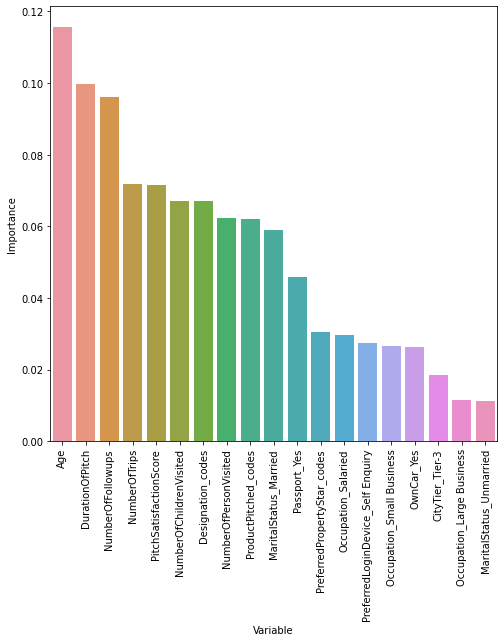

In [64]:
# Looking at the feature importances
importance = pd.DataFrame(RF1.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]
sorted_idx = RF1.feature_importances_.argsort()[::-1]
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x=importance['Variable'][sorted_idx],y='Importance',data = importance,ci=0)
axes.set_xticklabels(labels = importance['Variable'][sorted_idx],rotation=90)
plt.show()

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.1min finished


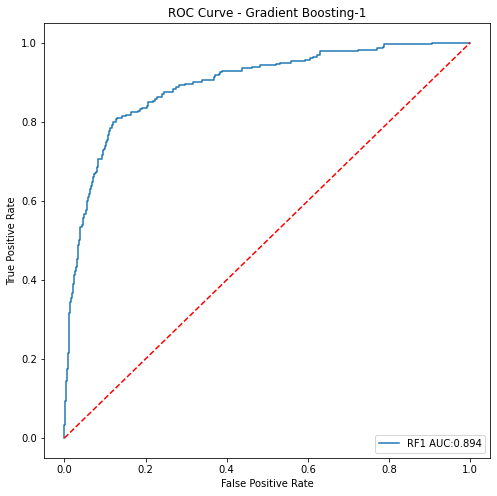

In [65]:
# Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
GB1 = GradientBoostingClassifier()
params = {'loss':['deviance','exponential'],
         'learning_rate':[0.15,0.17,0.20],
         'n_estimators':[300,500,700]}
grid = GridSearchCV(estimator=GB1,param_grid=params,cv=10,n_jobs=-1,verbose=1)
grid.fit(X_train,Y_train.values.ravel())
GB1 = grid.best_estimator_
GB1.fit(X_train,Y_train.values.ravel())

Y_pred_tr_GB1 = GB1.predict(X_train)
Y_predprob_tr_GB1 = GB1.predict_proba(X_train)[:,1]
Y_pred_te_GB1 = GB1.predict(X_test)
Y_predprob_te_GB1 = GB1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, GB1.predict_proba(X_test)[:,1])
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'RF1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_GB1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting-1')
plt.legend(loc="lower right")

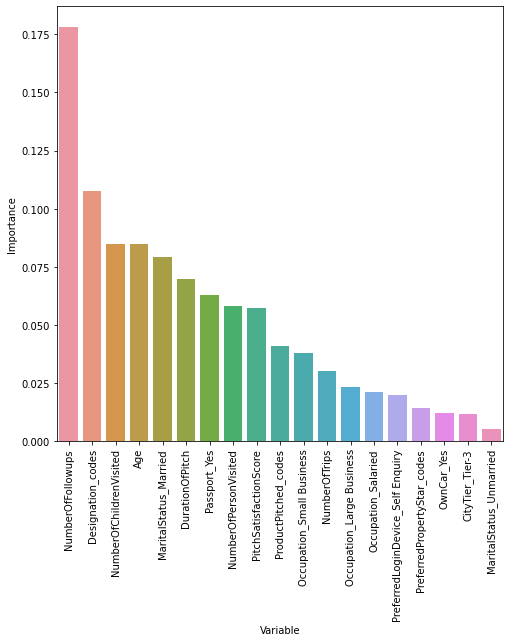

In [66]:
# Looking at Feature importances
importance = pd.DataFrame(GB1.feature_importances_,columns=['Importance'])
importance['Variable'] = X_train.columns
importance=importance[['Variable','Importance']]
sorted_idx = GB1.feature_importances_.argsort()[::-1]
fig,axes = plt.subplots(figsize=(8,8))
sns.barplot(x=importance['Variable'][sorted_idx],y='Importance',data = importance,ci=0)
axes.set_xticklabels(labels = importance['Variable'][sorted_idx],rotation=90)
plt.show()

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


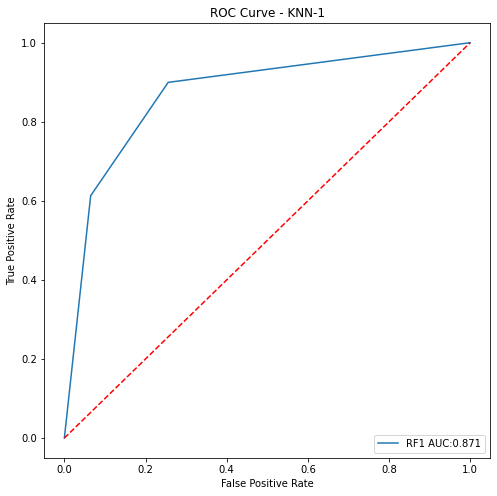

In [67]:
# KNN model
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(std.fit_transform(X_test),columns = X_test.columns)
from sklearn.neighbors import KNeighborsClassifier
KNN1 = KNeighborsClassifier()
params = {'n_neighbors':range(2,11),
         'p':[2,3],
         'metric':['manhattan','chebyshev','minkowski']}
grid = GridSearchCV(estimator=KNN1,param_grid=params,cv=10,n_jobs=-1,verbose=1)
grid.fit(X_train_std,Y_train.values.ravel())

KNN1 = grid.best_estimator_
KNN1.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_KNN1 = KNN1.predict(X_train_std)
Y_predprob_tr_KNN1 = KNN1.predict_proba(X_train_std)[:,1]
Y_pred_te_KNN1 = KNN1.predict(X_test_std)
Y_predprob_te_KNN1 = KNN1.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_KNN1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'RF1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_KNN1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN-1')
plt.legend(loc="lower right")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.9min finished


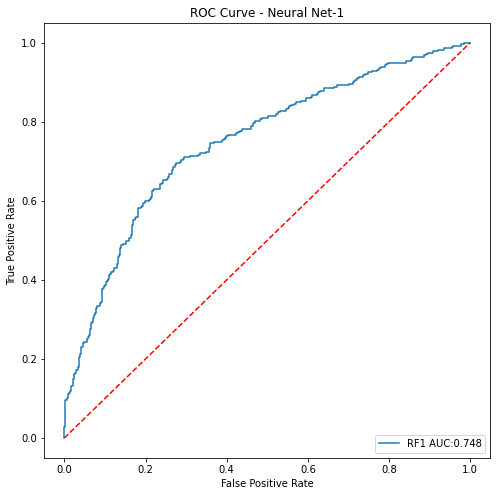

In [68]:
# Neural Network model
from sklearn.neural_network import MLPClassifier
param_grid = {
    'activation':['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000],
    'solver': ['sgd','adam'],
    'tol': [0.001],
}

NN1 = MLPClassifier(random_state=1)
 
grid = GridSearchCV(estimator = NN1, param_grid = param_grid, cv = 3,verbose=2,n_jobs=-1)

grid.fit(X_train_std, Y_train.values.ravel())

NN1 = grid_search.best_estimator_
NN1.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_NN1 = NN1.predict(X_train_std)
Y_predprob_tr_NN1 = NN1.predict_proba(X_train_std)[:,1]
Y_pred_te_NN1 = NN1.predict(X_test_std)
Y_predprob_te_NN1 = NN1.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_NN1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'RF1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_NN1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Net-1')
plt.legend(loc="lower right")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.0min finished


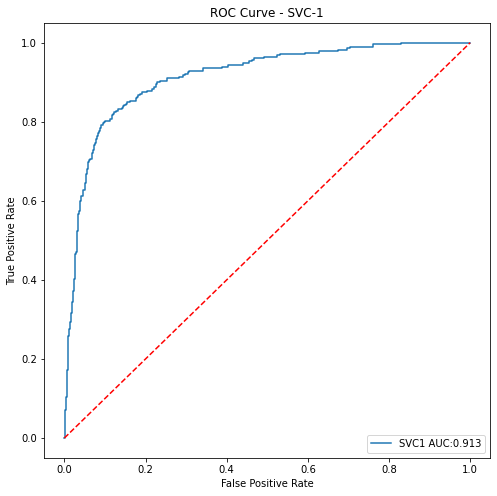

In [69]:
# SVC model
from sklearn.svm import SVC
SVC1 = SVC()
params = {'C':[0.01,1,10,20],
         'kernel':['linear','poly','rbf','sigmoid'],
         'probability':[True]}
grid = GridSearchCV(estimator=SVC1,param_grid=params,cv=3,n_jobs=-1,verbose=1)
grid.fit(X_train_std,Y_train.values.ravel())

SVC1 =grid.best_estimator_
SVC1.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_SVC1 = SVC1.predict(X_train_std)
Y_predprob_tr_SVC1 = SVC1.predict_proba(X_train_std)[:,1]
Y_pred_te_SVC1 = SVC1.predict(X_test_std)
Y_predprob_te_SVC1 = SVC1.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_SVC1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'SVC1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_SVC1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC-1')
plt.legend(loc="lower right")

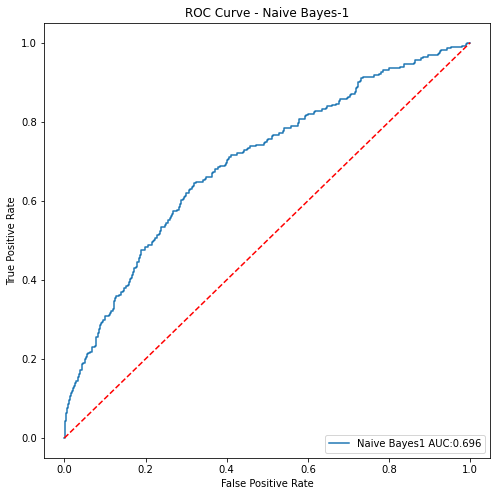

In [70]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(X_train,Y_train.values.ravel())

Y_pred_tr_NB1 = NB1.predict(X_train)
Y_predprob_tr_NB1 = NB1.predict_proba(X_train)[:,1]
Y_pred_te_NB1 = NB1.predict(X_test)
Y_predprob_te_NB1 = NB1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_NB1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Naive Bayes1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_NB1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes-1')
plt.legend(loc="lower right")

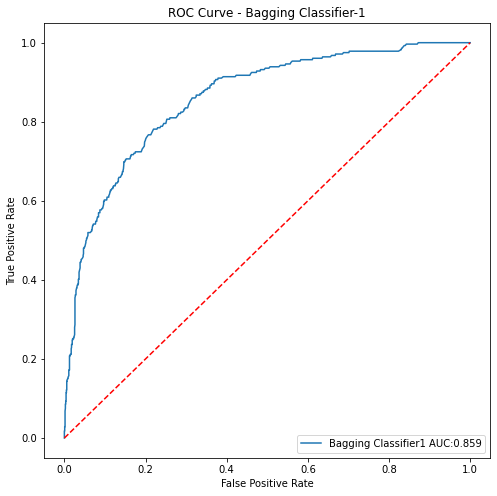

In [71]:
# Bagging Classifier using KNN1 as base algorithm
from sklearn.ensemble import BaggingClassifier
base_cls = KNN1
num_es = 500
BC1 = BaggingClassifier(base_estimator = base_cls, # Base estimator - KNN
                       n_estimators = num_es, # Number of estimators
                       max_samples=1000, 
                       max_features=15)
BC1.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_BC1 = BC1.predict(X_train_std)
Y_predprob_tr_BC1 = BC1.predict_proba(X_train_std)[:,1]
Y_pred_te_BC1 = BC1.predict(X_test_std)
Y_predprob_te_BC1 = BC1.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_BC1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Bagging Classifier1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_BC1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier-1')
plt.legend(loc="lower right")

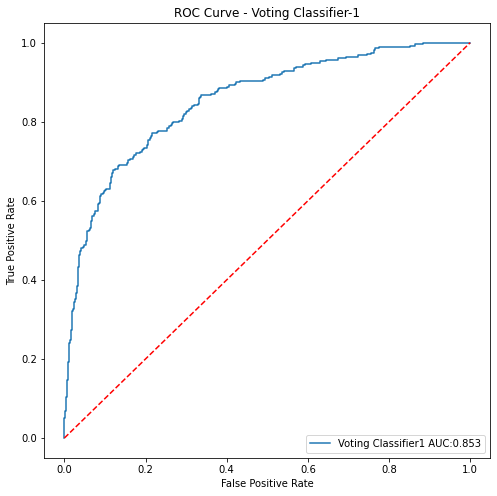

In [72]:
# Ensemble on few of the above models 
from sklearn.ensemble import VotingClassifier
estim = [('LR1',LR1),('LR2',LR2),('DT1',DT1),('RF1',RF1),('GB1',GB1),('NB1',NB1)]
VOT1 = VotingClassifier(estimators=estim,voting='soft')
VOT1.fit(X_train,Y_train.values.ravel())

Y_pred_tr_VOT1 = VOT1.predict(X_train)
Y_predprob_tr_VOT1 = VOT1.predict_proba(X_train)[:,1]
Y_pred_te_VOT1 = VOT1.predict(X_test)
Y_predprob_te_VOT1 = VOT1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_VOT1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Voting Classifier1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_VOT1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier-1')
plt.legend(loc="lower right")

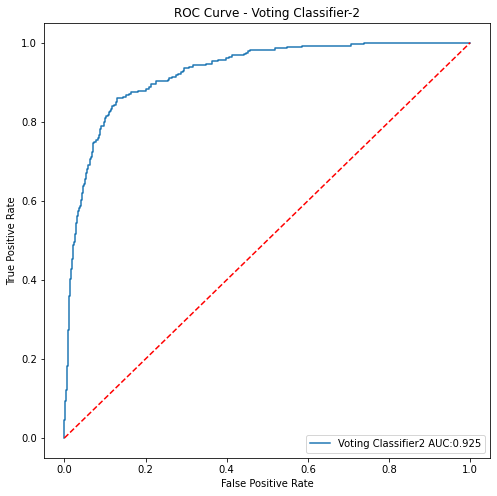

In [73]:
# Ensemble on few of the above models 
from sklearn.ensemble import VotingClassifier
estim = [('KNN1',KNN1),('NN1',NN1),('SVC1',SVC1),('BC1',BC1)]
VOT2 = VotingClassifier(estimators=estim,voting='soft',weights=[2,1,3,2])
VOT2.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_VOT2 = VOT2.predict(X_train_std)
Y_predprob_tr_VOT2 = VOT2.predict_proba(X_train_std)[:,1]
Y_pred_te_VOT2 = VOT2.predict(X_test_std)
Y_predprob_te_VOT2 = VOT2.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_VOT2)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Voting Classifier2 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_VOT2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier-2')
plt.legend(loc="lower right")

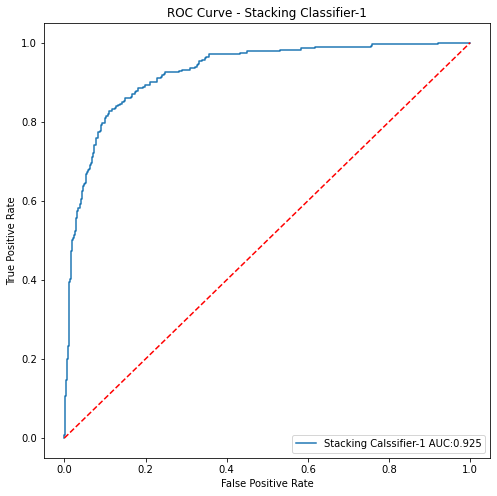

In [74]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacker = LogisticRegression(penalty='none',solver='newton-cg')
STA1 = StackingClassifier(estimators=estim,final_estimator = stacker,cv=5,verbose=2,n_jobs=-1)
STA1.fit(X_train_std,Y_train.values.ravel())

Y_pred_tr_STA1 = STA1.predict(X_train_std)
Y_predprob_tr_STA1 = STA1.predict_proba(X_train_std)[:,1]
Y_pred_te_STA1 = STA1.predict(X_test_std)
Y_predprob_te_STA1 = STA1.predict_proba(X_test_std)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test,Y_predprob_te_STA1)
fig,axes = plt.subplots(figsize=(8,8))
plt.plot(fpr,tpr,label = 'Stacking Calssifier-1 AUC:{:.3f}'.format(roc_auc_score(Y_test,Y_predprob_te_STA1)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier-1')
plt.legend(loc="lower right")

In [75]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['LR1','LR2','DT1','RF1','GB1','KNN1','NN1','SVC1','NB1','BC1','VOT1','VOT2','STA1']
acc=[]
pre=[]
rec=[]
f1=[]
testing_pred = [Y_pred_te_LR1,Y_pred_te_LR2,Y_pred_te_DT1,Y_pred_te_RF1,Y_pred_te_GB1,Y_pred_te_KNN1,Y_pred_te_NN1,
               Y_pred_te_SVC1,Y_pred_te_NB1,Y_pred_te_BC1,Y_pred_te_VOT1,Y_pred_te_VOT2,Y_pred_te_STA1]
for i in testing_pred:
    acc.append(accuracy_score(Y_test,i))
    pre.append(precision_score(Y_test,i))
    rec.append(recall_score(Y_test,i))
    f1.append(f1_score(Y_test,i))
    
metric_df_test = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':pre,'Recall':rec,'F1_Score':f1})    
metric_df_test   

,Model,Accuracy,Precision,Recall,F1_Score
0,LR1,0.758691,0.405542,0.577061,0.476331
1,LR2,0.760736,0.408629,0.577061,0.478455
2,DT1,0.833674,0.558140,0.602151,0.579310
3,RF1,0.865712,0.727778,0.469534,0.570806
4,GB1,0.878664,0.711297,0.609319,0.656371
5,KNN1,0.873892,0.689516,0.612903,0.648956
6,NN1,0.516701,0.261111,0.842294,0.398643
7,SVC1,0.835037,0.542141,0.853047,0.662953
8,NB1,0.707566,0.336245,0.551971,0.417910
9,BC1,0.810498,0.501253,0.716846,0.589971


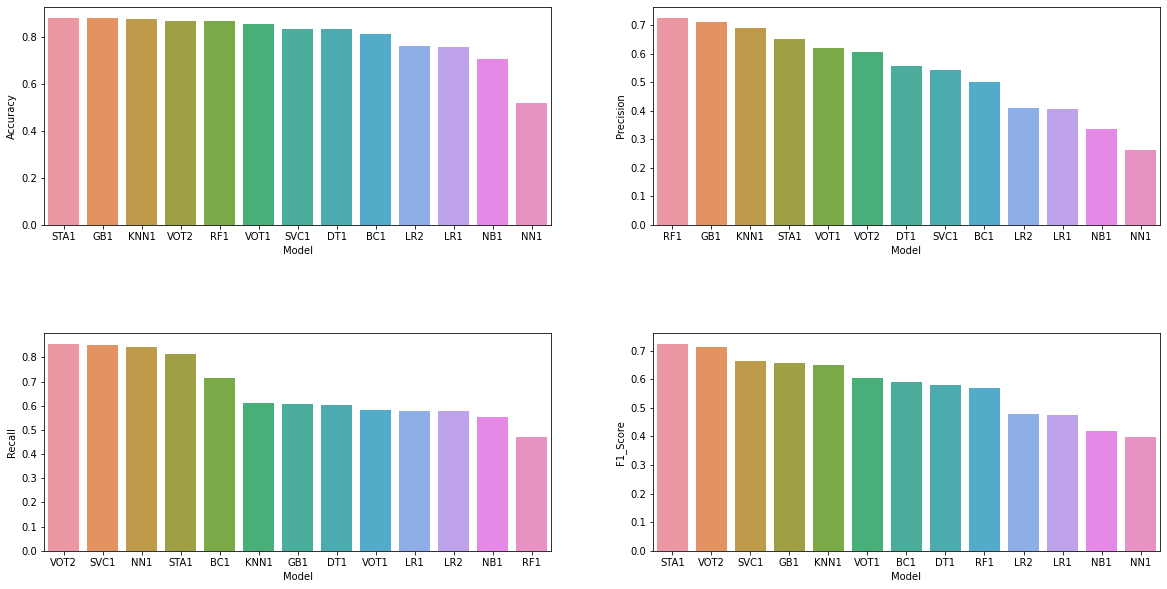

In [76]:
# Visualizing the model performance
fig,axes = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
cols = list(metric_df_test.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Model',y=i,data=metric_df_test.sort_values(by = i,ascending=False),ax=j)